In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

df = pd.read_csv("../assets/dataset.csv")

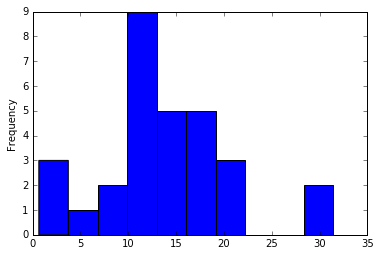

In [4]:
# create a histogram for the dataFrame
measurements = df.measurements
measurements.plot( kind = "hist" )

In [5]:
# find the length of measurements
n = len( measurements )

In [14]:
n

30

In [6]:
# get the mean and standard_deviation of the dataset
mean = measurements.mean()
print mean

stdev = measurements.std()
print stdev

14.0224282791
6.73042721173


In [7]:
# sort measurements from least to greatest
measurementsSorted = np.sort( measurements )

In [8]:
print( measurementsSorted )

[  0.65420069   2.51073122   3.57326044   6.32880343   9.6196068
   9.68612379   9.93590727   9.95752217  10.43264987  11.52707377
  11.66162395  11.95896084  12.13868406  12.61624737  12.82338917
  14.64197822  14.975124    15.52200558  15.81075811  15.82163004
  16.85730122  16.95646689  17.40759363  17.53112835  17.56077884
  20.1448896   20.22467755  20.95836562  29.37931847  31.45604741]


In [9]:
# generate n numbers from a normal distribution with same mean and stdev
# sort these numbers from least to greatest

numsNormal = np.random.normal(loc=mean, scale=stdev, size=n)
numsNormal = np.sort( numsNormal )

In [15]:
numsNormal

array([  0.2314343 ,   1.62528592,   5.08332441,   5.213369  ,
         5.95967699,   7.47272041,   7.65015021,   7.96358932,
         8.12019828,   8.68380346,  10.39763711,  12.35597765,
        12.79206348,  12.92662226,  13.13917334,  13.74491847,
        13.75092761,  14.88622516,  15.55910945,  15.7001362 ,
        15.79059425,  16.49007554,  17.93078694,  18.10808184,
        18.6455399 ,  18.74496701,  18.81992831,  18.94938179,
        21.29846021,  21.37822638])

In [10]:
# generate n numbers from a exponential distribution, note you need the rate parameter for exponential

numsExponential = np.random.exponential( scale = mean, size=n )
numsExponential = np.sort( numsExponential )

In [11]:
# generate n numbers from a uniform distribution, note you need a, and b parameters for uniform ( min and max )

minNum = measurements.min()
maxNum = measurements.max()

numsUniform = np.random.uniform( low = minNum, high = maxNum, size = n )
numsUniform = np.sort( numsUniform )

In [12]:
# print a scatter plot of actual quantiles (your sorted dataset) vs hypothetical quantiles (generated numbers)
# from each distribution.

objects = {
            "measurements" : measurementsSorted, 
            "numsNormal"   : numsNormal, 
            "numsExponential" : numsExponential,
            "numsUniform" : numsUniform
          }

df = pd.DataFrame( objects ) 

In [16]:
df.head()

,measurements,numsExponential,numsNormal,numsUniform
0,0.654201,0.176564,0.231434,1.411572
1,2.510731,0.533831,1.625286,2.070870
2,3.573260,0.566502,5.083324,2.130767
3,6.328803,0.596103,5.213369,3.416720
4,9.619607,0.604255,5.959677,3.545100


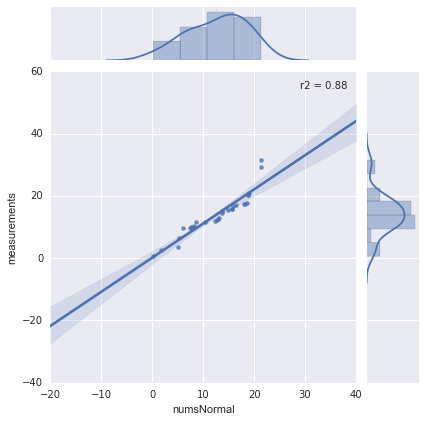

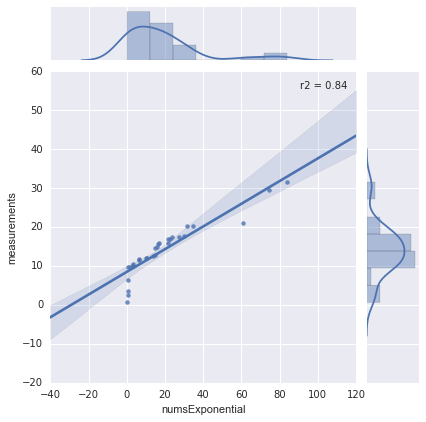

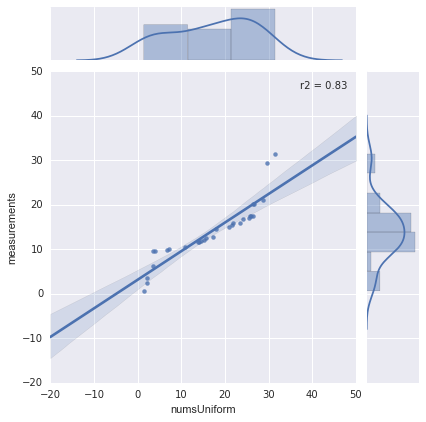

In [13]:
import seaborn as sns
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(df.numsNormal, df.measurements, kind="reg", stat_func=r2)
sns.jointplot(df.numsExponential, df.measurements, kind="reg", stat_func=r2)
sns.jointplot(df.numsUniform, df.measurements, kind="reg", stat_func=r2)